<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        📊 Linear Regression: Boston Housing Dataset 🏠
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        The Boston Housing Dataset is a widely used dataset in machine learning, ideal for regression problems. In this notebook, we aim to predict housing prices based on various features using linear regression. Let's explore the dataset, build a regression model, and evaluate its performance step by step!
    </p>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        📊 Loading and Inspecting the Dataset
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        In this section, we load the Boston Housing dataset from a CSV file using the <code>pandas</code> library. The function <code>pd.read_csv()</code> reads the data from the specified path, and <code>df.head()</code> displays the first few rows of the dataset, allowing us to quickly inspect its structure and ensure that the data has been loaded correctly. This step is crucial for understanding the columns and values present in the dataset before proceeding with data preprocessing and analysis.
    </p>
</div>


In [2]:
df = pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        🧮 Dataset Information Summary
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        The <code>df.info()</code> function provides a concise summary of the dataset, including details about the number of non-null entries in each column, the data type of each column, and the total number of entries in the dataset. This step is important to quickly check for any missing values and verify the structure of the data, such as whether the columns are of the expected data type (e.g., numeric, object). This helps in the initial stages of data cleaning and preprocessing.
    </p>
</div>


In [10]:
df.info()
# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        📊 Descriptive Statistics of the Dataset
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        The <code>df.describe()</code> function provides a statistical summary of the numerical columns in the dataset. It returns key statistics such as the count, mean, standard deviation, minimum, maximum, and the quartiles (25%, 50%, and 75%) for each numerical feature. This summary allows us to quickly understand the distribution and spread of the data, helping us identify any potential outliers or trends in the features. It is an essential step for exploratory data analysis (EDA) to comprehend the basic statistics before further analysis or modeling.
    </p>
</div>


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        📊 Visualizing Distributions of Numerical Features
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        In this section, we use <code>seaborn</code> and <code>matplotlib</code> to create a series of histograms for each numerical feature in the dataset. The histograms also include Kernel Density Estimation (KDE) curves, which help visualize the distribution of the data. The function <code>plt.subplot()</code> allows us to arrange the histograms in a grid layout of 3 rows and 5 columns, ensuring that all numerical columns are displayed in a compact and readable format. By visualizing the distributions of features like crime rates, average number of rooms, or property taxes, we can better understand their patterns and potential relationships with the target variable (house prices).
    </p>
</div>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

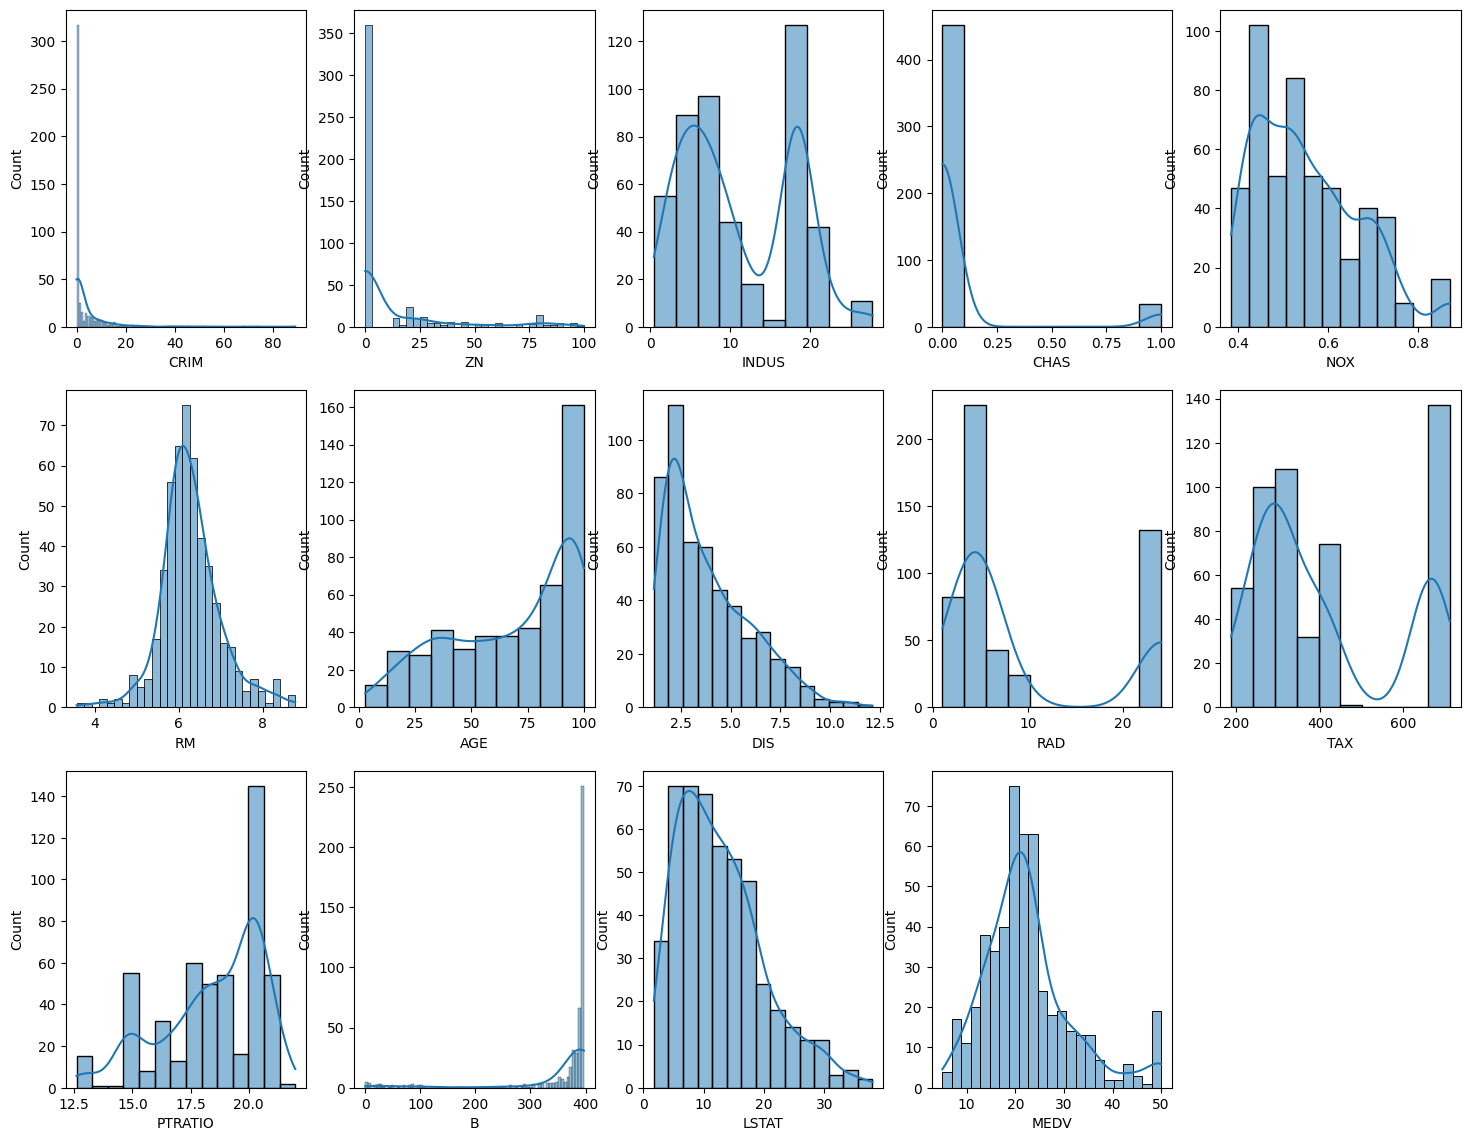

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,14))
num = 1

for col in df:
    if(num<=14):
        
        plt.subplot(3, 5, num)
        sns.histplot(df[col], kde = True)
        
    num += 1

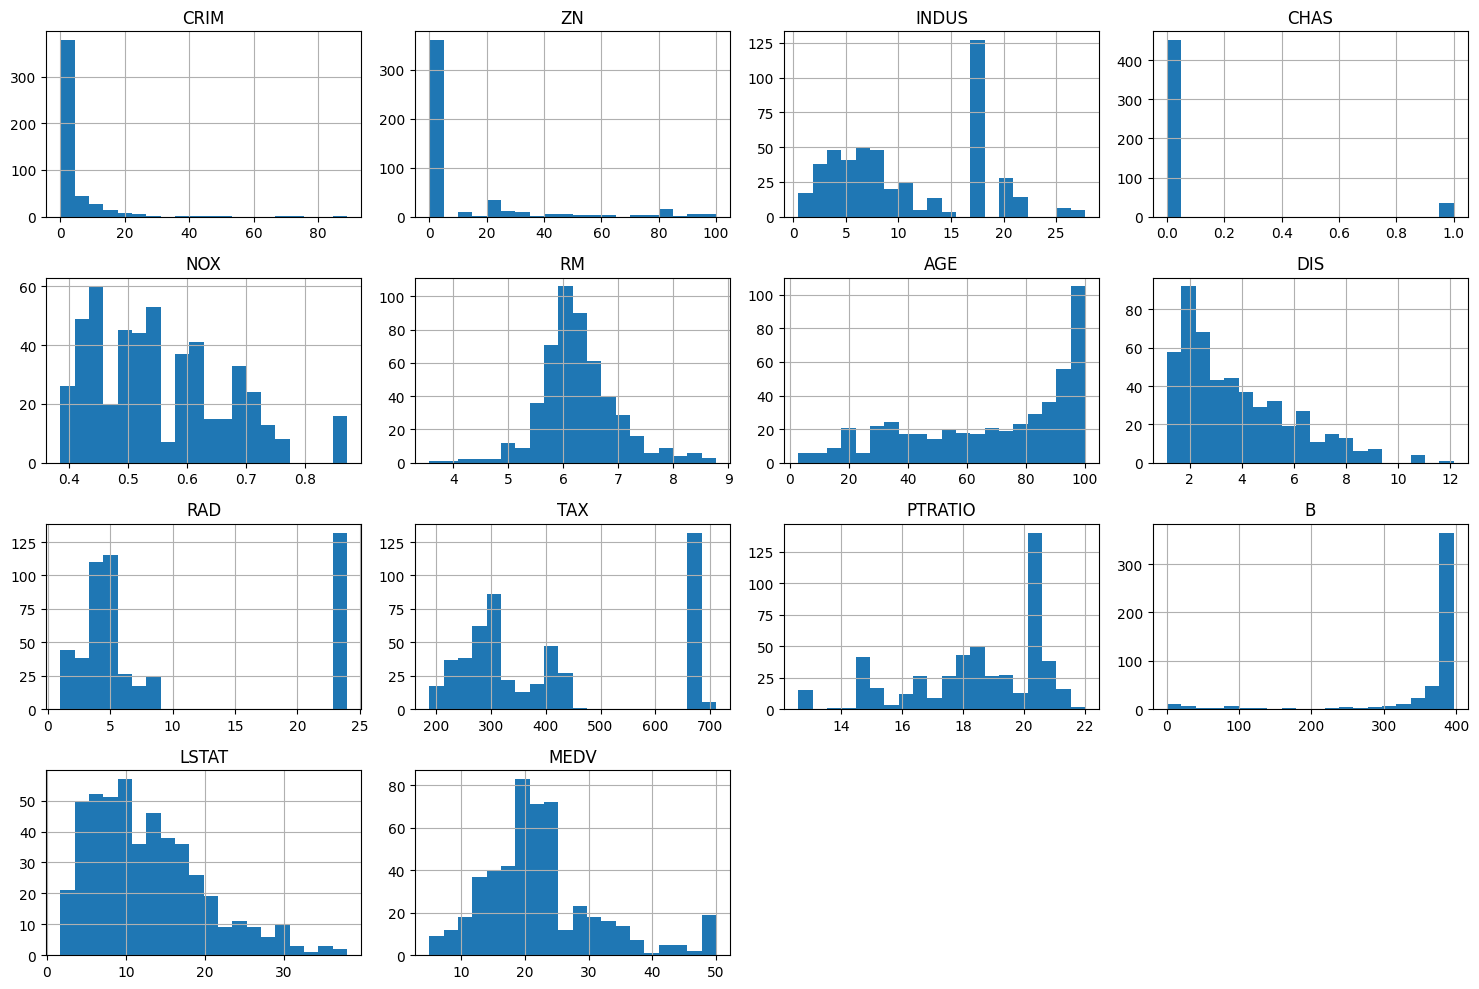

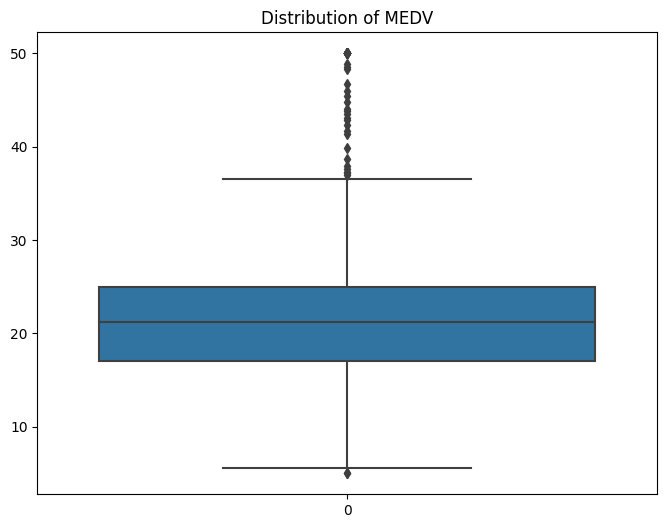

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot for target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(df['MEDV'])
plt.title('Distribution of MEDV')
plt.show()


<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        📉 Visualizing Relationships Between Features and House Prices
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        In this section, we visualize the relationship between each feature in the dataset and the target variable, 'MEDV' (Median value of homes). We use <code>seaborn</code>'s <code>regplot()</code> to plot a scatterplot with a linear regression line for each numerical feature. The function <code>plt.subplot()</code> arranges these plots into a grid with 3 rows and 5 columns, ensuring we can see the relationships clearly. These visualizations help us identify potential linear relationships between the features (such as crime rates, number of rooms, etc.) and house prices, which is crucial for understanding how each feature influences the target variable.
    </p>
</div>


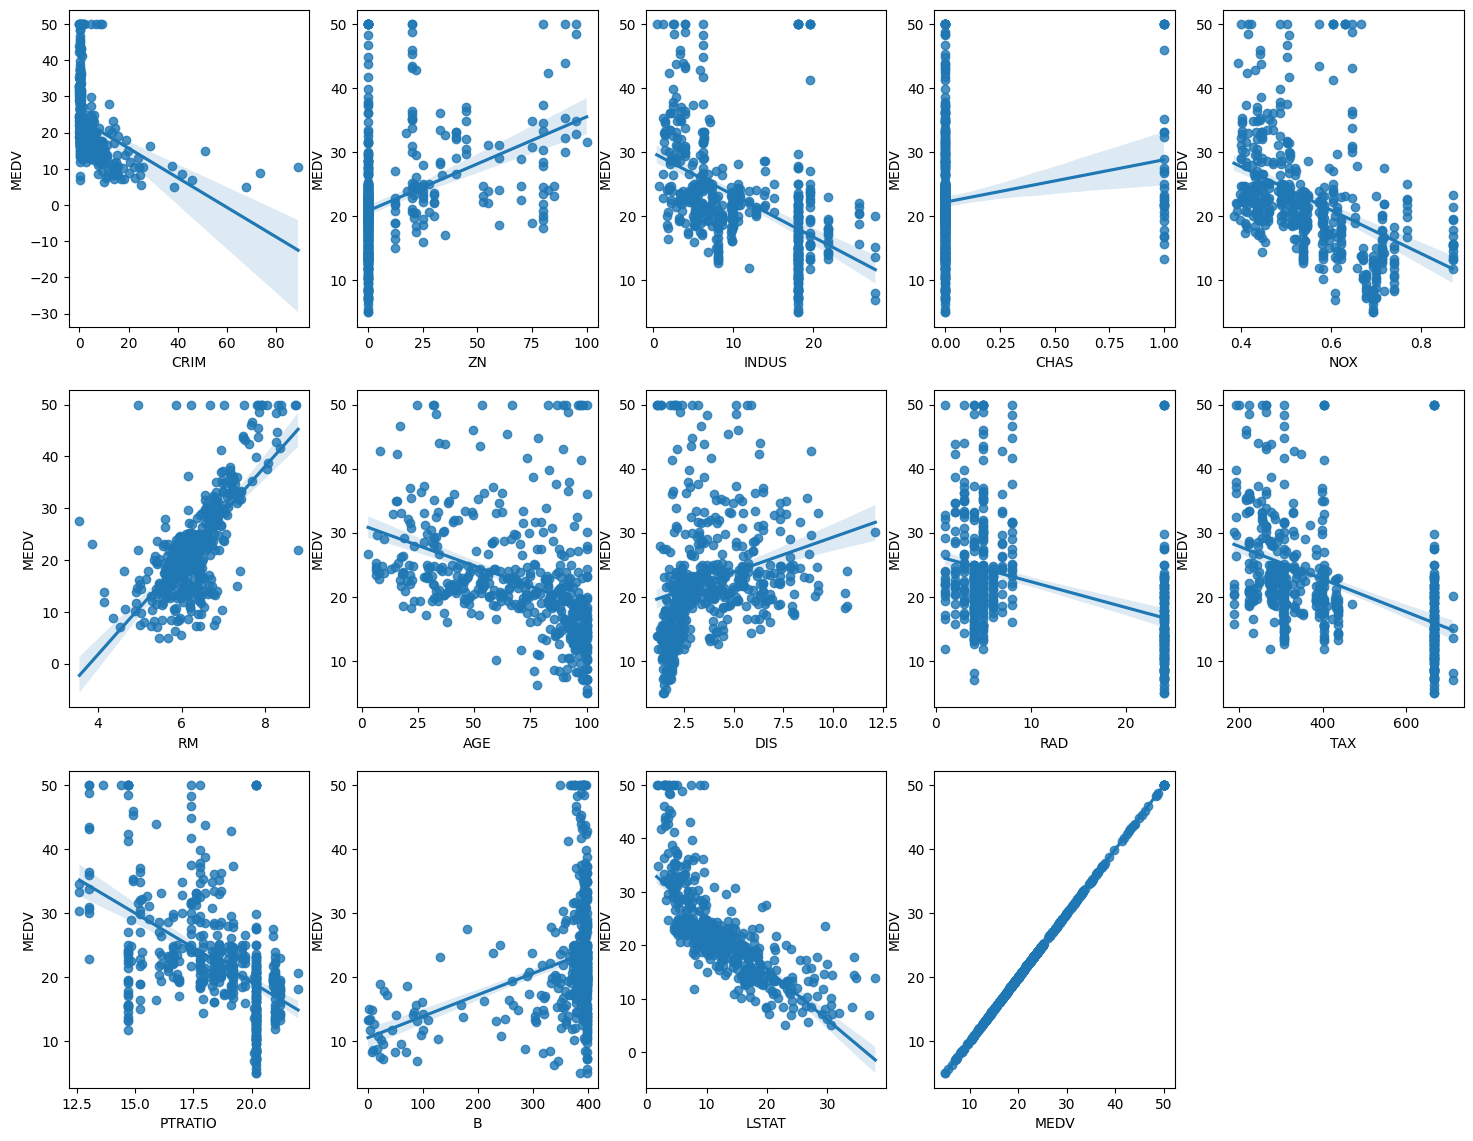

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,14))
num = 1

for col in df:
    if(num<=14):
        
        plt.subplot(3, 5, num)
        sns.regplot(x=df[col], y=df['MEDV'])
        
    num += 1



<div style="text-align: center;">
    <p style="background-color: #8aeb92; color: #910909; font-size: 2.0em; font-family: 'Arial', sans-serif; text-align: center; border-radius: 25px; border: 4px solid #910909; display: inline-block; padding: 20px 20px; margin: 0 auto; line-height: 1.5; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
        🔥 Correlation Heatmap of Features
    </p>
    <p style="font-size: 1.0em; font-family: 'Arial', sans-serif; text-align: justify; line-height: 1.5; padding: 10px;">
        In this section, we calculate and visualize the correlation matrix of all numerical features in the dataset using <code>df.corr()</code>. A correlation matrix helps to identify the relationships between different features, showing how strongly they are related to one another. We use <code>seaborn</code>'s <code>heatmap()</code> to display the correlation matrix as a heatmap, where the intensity of the color indicates the strength of the correlation. The <code>annot=True</code> argument ensures that the correlation coefficients are displayed directly on the heatmap. This visualization allows us to quickly identify highly correlated features, which is essential for feature selection and understanding feature interactions before model training.
    </p>
</div>


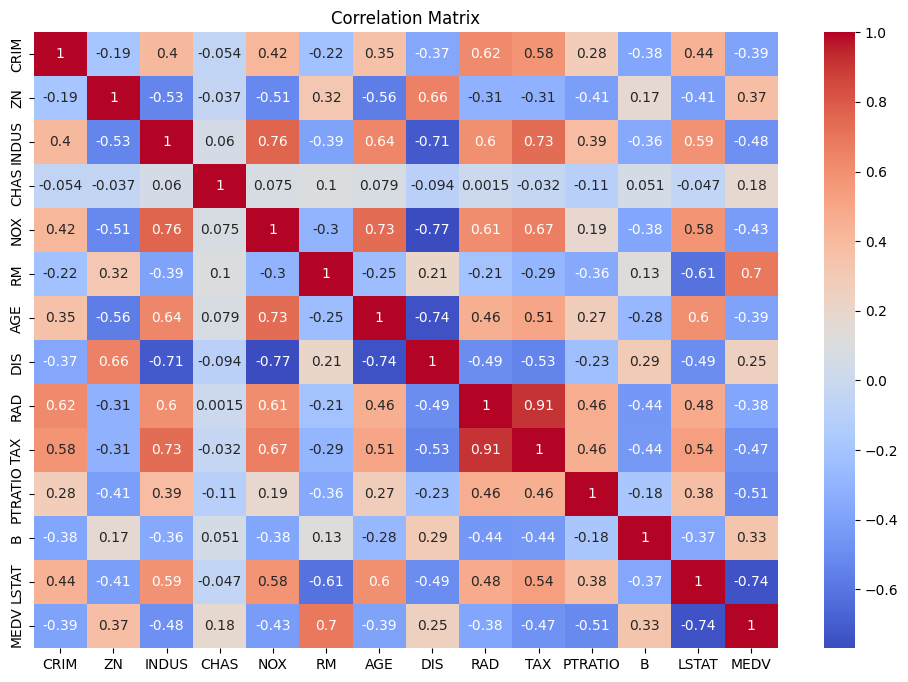

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


In [15]:
# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check the correlation between features and target (MEDV)
print(corr_matrix['MEDV'].sort_values(ascending=False))


<Axes: >

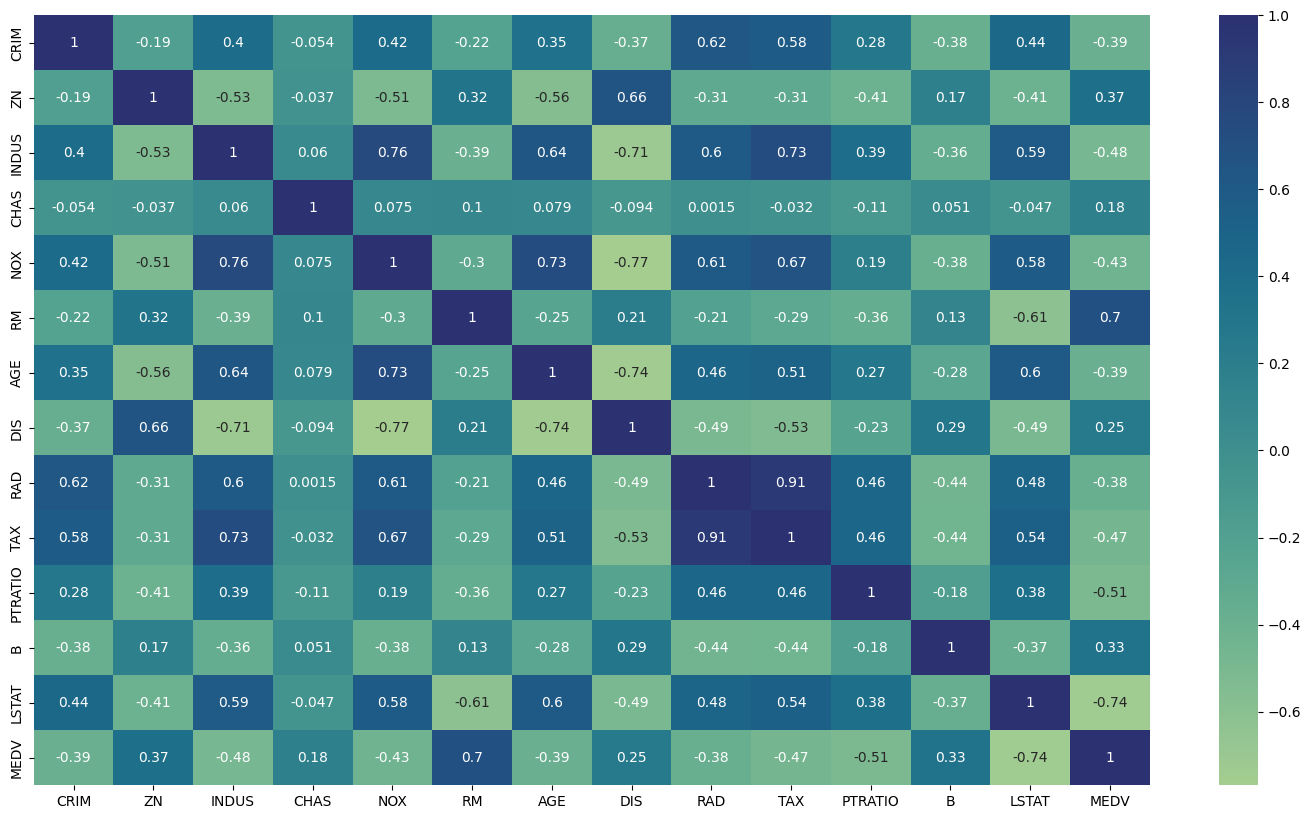

In [8]:
corr = df.corr()

plt.figure(figsize = (18,10))
sns.heatmap(corr, annot = True, cmap = 'crest')

2. Data Preprocessing
a. Handle Missing Values
If missing values exist, there are different strategies to handle them:

Drop rows or columns if a feature has a significant amount of missing data.
Impute missing values with the mean, median, or mode for numerical columns.

In [17]:
# Drop rows with missing target values (if any)
df = df.dropna(subset=['MEDV'])

# For other missing values, you could use imputation (mean imputation here)
df.fillna(df.mean(), inplace=True)


b. Feature Scaling for Gradient Descent
Since gradient descent works more efficiently with scaled features, scale numerical features, especially those with different ranges (e.g., CRIM, TAX, etc.). You can use StandardScaler for standardizing the features.

In [19]:
from sklearn.preprocessing import StandardScaler

# List of features to scale (excluding 'MEDV' - target variable)
features = df.columns.drop('MEDV')

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df[features] = scaler.fit_transform(df[features])

# Verify scaling by checking the mean and standard deviation of scaled features
print(df[features].mean(), df[features].std())


CRIM      -2.808469e-17
ZN        -7.196703e-17
INDUS     -5.616939e-17
CHAS      -4.212704e-17
NOX       -1.965929e-16
RM        -1.088282e-16
AGE        5.055245e-16
DIS       -8.425408e-17
RAD       -1.123388e-16
TAX        0.000000e+00
PTRATIO   -4.212704e-16
B         -7.442444e-16
LSTAT     -1.404235e-16
dtype: float64 CRIM       1.00099
ZN         1.00099
INDUS      1.00099
CHAS       1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
dtype: float64


c. Handle Categorical Features
The CHAS column is categorical. Although it's binary (0 or 1), ensure that it is properly treated as a categorical variable if necessary.

In [24]:
# Check summary again after handling missing values and scaling
print(df.describe())


               CRIM            ZN         INDUS           NOX            RM  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -2.808469e-17 -7.196703e-17 -5.616939e-17 -1.965929e-16 -1.088282e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.223285e-01 -4.896385e-01 -1.587438e+00 -1.465882e+00 -3.880249e+00   
25%   -4.133192e-01 -4.896385e-01 -8.806806e-01 -9.130288e-01 -5.686303e-01   
50%   -3.890710e-01 -4.896385e-01 -1.769121e-01 -1.442174e-01 -1.084655e-01   
75%   -5.201739e-17 -7.757562e-17  1.048332e+00  5.986790e-01  4.827678e-01   
max    9.998958e+00  3.877481e+00  2.488742e+00  2.732346e+00  3.555044e+00   

                AGE           DIS           RAD         TAX       PTRATIO  \
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  5.060000e+02   
mean   5.055245e-16 -8.425408e-17 -1.123388e-16    0.000000 -4.212704e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00    1.0009

In [34]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Perform gradient descent for linear regression.

    Parameters:
        X (ndarray): Feature matrix with shape (m, n), where m is the number of samples and n is the number of features.
        y (ndarray): Target values with shape (m,).
        learning_rate (float): Learning rate for gradient updates.
        iterations (int): Number of iterations for gradient descent.

    Returns:
        theta (ndarray): Coefficients for linear regression.
        cost_history (list): History of cost values at each iteration.
    """
    m, n = X.shape  # Number of samples (m) and features (n)
    theta = np.zeros(n)  # Initialize weights
    cost_history = []  # To store cost at each iteration

    for i in range(iterations):
        # Predicted values
        y_pred = np.dot(X, theta)

        # Compute the error
        error = y_pred - y

        # Compute the gradient
        gradient = (1 / m) * np.dot(X.T, error)

        # Update theta
        theta -= learning_rate * gradient

        # Compute and store the cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Optional: Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")

    return theta, cost_history


In [37]:
def preprocess_data(df, target_col, test_size=0.2):
    """
    Preprocess the dataset by splitting, scaling, and adding a bias term.

    Parameters:
        df (DataFrame): The dataset.
        target_col (str): The target column name.
        test_size (float): Proportion of the dataset to include in the test split.

    Returns:
        X_train_scaled (ndarray): Scaled training features with bias term.
        X_test_scaled (ndarray): Scaled testing features with bias term.
        y_train (ndarray): Training target values.
        y_test (ndarray): Testing target values.
    """
    # Split features and target
    X = df.drop(columns=[target_col]).values
    y = df[target_col].values

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add bias term
    X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

    return X_train_scaled, X_test_scaled, y_train, y_test


In [38]:
# Preprocess the data
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df, target_col='MEDV')

# Train using Gradient Descent
theta, cost_history = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, iterations=1000)

# Predictions on the test set
y_pred_gd = np.dot(X_test_scaled, theta)

# Evaluate the model (Mean Squared Error)
mse_gd = np.mean((y_pred_gd - y_test) ** 2)
print(f"Gradient Descent MSE: {mse_gd:.4f}")


Iteration 0: Cost 303.2777
Iteration 100: Cost 48.2985
Iteration 200: Cost 16.6821
Iteration 300: Cost 12.3305
Iteration 400: Cost 11.6477
Iteration 500: Cost 11.4855
Iteration 600: Cost 11.4127
Iteration 700: Cost 11.3655
Iteration 800: Cost 11.3313
Iteration 900: Cost 11.3057
Gradient Descent MSE: 25.7456


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train using Scikit-learn
model = LinearRegression()
model.fit(X_train_scaled[:, 1:], y_train)  # Exclude bias term (intercept)
y_pred_sklearn = model.predict(X_test_scaled[:, 1:])

# Evaluate the model (Mean Squared Error)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Scikit-learn Linear Regression MSE: {mse_sklearn:.4f}")


Scikit-learn Linear Regression MSE: 25.0177


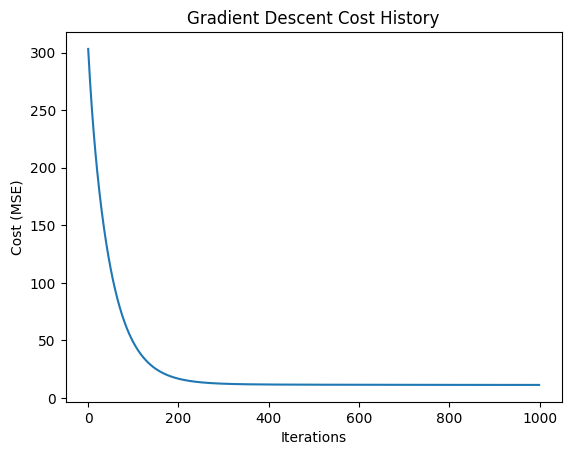

In [40]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost History")
plt.show()


 Hyperparameter Tuning: Experiment with Different Learning Rates

Iteration 0: Cost 303.2777
Iteration 100: Cost 296.0082
Iteration 200: Cost 289.0443
Iteration 300: Cost 282.3620
Iteration 400: Cost 275.9401
Iteration 500: Cost 269.7591
Iteration 600: Cost 263.8018
Iteration 700: Cost 258.0526
Iteration 800: Cost 252.4974
Iteration 900: Cost 247.1236
Iteration 0: Cost 303.2777
Iteration 100: Cost 241.8839
Iteration 200: Cost 197.3271
Iteration 300: Cost 162.6573
Iteration 400: Cost 134.8752
Iteration 500: Cost 112.3503
Iteration 600: Cost 94.0031
Iteration 700: Cost 79.0299
Iteration 800: Cost 66.7995
Iteration 900: Cost 56.8044
Iteration 0: Cost 303.2777
Iteration 100: Cost 48.2985
Iteration 200: Cost 16.6821
Iteration 300: Cost 12.3305
Iteration 400: Cost 11.6477
Iteration 500: Cost 11.4855
Iteration 600: Cost 11.4127
Iteration 700: Cost 11.3655
Iteration 800: Cost 11.3313
Iteration 900: Cost 11.3057
Iteration 0: Cost 303.2777
Iteration 100: Cost 11.2852
Iteration 200: Cost 11.2199
Iteration 300: Cost 11.2091
Iteration 400: Cost 11.2064
Iteration 

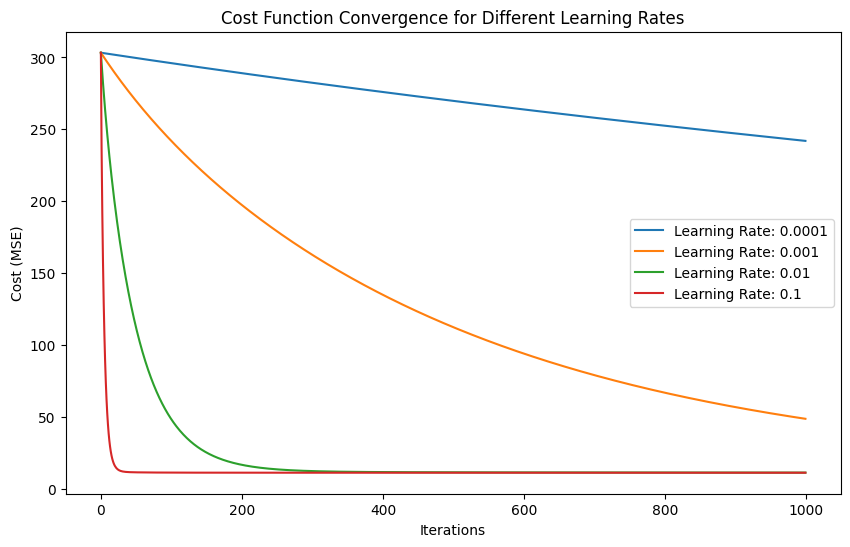

In [51]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
iterations = 1000

# Dictionary to store cost histories for each learning rate
cost_histories = {}

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    # Train the model with the current learning rate
    theta, cost_history = gradient_descent(X_train_scaled, y_train, learning_rate=lr, iterations=iterations)
    cost_histories[lr] = cost_history

    # Plot cost history
    plt.plot(cost_history, label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence for Different Learning Rates")
plt.legend()
plt.show()


Fast Convergence:
The red line (learning rate: 0.1) converges the fastest, reaching a low cost in fewer iterations. If speed is critical and you want to reach a good solution quickly, this is a good choice. However, this could also risk overshooting or instability in other problems.

Balanced Convergence:
The green line (learning rate: 0.01) is slower than 0.1 but still converges relatively fast while being stable. It's a safer choice if stability and robustness are preferred.

Slow Convergence:
The orange line (learning rate: 0.001) and the blue line (learning rate: 0.0001) converge much more slowly, taking significantly more iterations. These might be suitable if the optimization landscape is very complex, and smaller steps are needed to avoid missing the minimum.

//////////////////////////////////////////////////////////////

Mean Squared Error (MSE)
MSE is a common metric for regression problems, representing the average squared difference between predicted and actual values. Lower MSE indicates better performance.

R-squared (R²)
R² measures how well the model explains the variability of the target variable. Its value ranges between:

𝑅2=1: Perfect fit.
𝑅2=0:Model does not explain variability.
𝑅2<0: Model performs worse than the mean of the target variable.

In [52]:
from sklearn.metrics import r2_score

# Gradient Descent Evaluation
mse_gd = np.mean((y_pred_gd - y_test)**2)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Gradient Descent Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_gd:.4f}")
print(f"  R-squared (R²): {r2_gd:.4f}")

# Scikit-learn Linear Regression Evaluation
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"\nScikit-learn Linear Regression Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_sklearn:.4f}")
print(f"  R-squared (R²): {r2_sklearn:.4f}")


Gradient Descent Evaluation:
  Mean Squared Error (MSE): 25.7456
  R-squared (R²): 0.6489

Scikit-learn Linear Regression Evaluation:
  Mean Squared Error (MSE): 25.0177
  R-squared (R²): 0.6589


Key Observations
Mean Squared Error (MSE):

Gradient Descent: 
25.7456
25.7456
Scikit-learn: 
25.0177
25.0177
Difference: The Scikit-learn implementation achieves a marginally lower MSE, indicating slightly better predictions.
R-squared (R²):

Gradient Descent: 
0.6489
0.6489
Scikit-learn: 
0.6589
0.6589
Difference: The Scikit-learn model explains about 1% more variance in the target variable than the gradient descent implementation.
Close Performance:

The close performance between the two models suggests that your gradient descent implementation is correct and converges well to the optimal solution.


==================================================================
**Discussing Performance**

Performance Comparison:
The MSE and R² values for both models should be relatively close if the gradient descent implementation is correct and converges to the optimal solution.
Slight differences may occur due to numerical precision or the choice of hyperparameters (learning rate and iterations).

Strengths of Gradient Descent Implementation:
Customizability: Allows learning rate and iterations to be adjusted for specific datasets.
Scalability: Works well for large datasets where closed-form solutions (e.g., normal equation) are computationally expensive.
Limitations of Gradient Descent

Convergence Issues:
Requires careful tuning of the learning rate. A high learning rate may cause divergence, while a low rate slows convergence.
The algorithm may converge to a local minimum or saddle point (though not an issue for linear regression with MSE).

Dependence on Scaling:
Gradient descent requires feature scaling (e.g., standardization) to ensure proper updates to weights.

Computational Expense:
Iterative updates may be slower compared to scikit-learn's optimized linear regression implementation, which uses efficient matrix operations.

Interpretability:
More effort is needed to understand and debug gradient descent compared to scikit-learn's pre-optimized model.

**bonus points**
When to Use Gradient Descent:
For very large datasets or distributed systems, where batch or stochastic gradient descent is preferred due to memory limitations.
When customization of the learning process is required.

When to Prefer Scikit-learn:
For small to medium-sized datasets, scikit-learn's linear regression is faster and more reliable as it internally handles optimization and preprocessing.

======================================================================================================================================================
Boston Housing Dataset Analysis and Model Implementation

Objective:

The objective of this project was to analyze the Boston Housing Dataset, perform exploratory data analysis (EDA), preprocess the data, and implement linear regression using gradient descent from scratch. The performance of the implemented model was compared against Scikit-learn’s Linear Regression model.

Findings:
1-Exploratory Data Analysis (EDA):

Visualized correlations between features and the target variable (MEDV) using heatmaps.
Found strong correlations of MEDV with features such as RM (positive) and LSTAT (negative).

2-Data Preprocessing:

Ensured no missing values in the dataset.
Scaled features to ensure efficient gradient descent convergence.

3-Model Implementation:

Gradient Descent was implemented from scratch to optimize the weights of the linear regression model.

Scikit-learn’s Linear Regression was used for comparison.

---------
4-Evaluation Metrics:

Gradient Descent:

Mean Squared Error (MSE): 25.7456

R-squared (ℜ²): 0.6489

Scikit-learn Linear Regression:

Mean Squared Error (MSE): 25.0177

R-squared (ℜ²): 0.6589

The results showed that both methods performed similarly, with Scikit-learn achieving marginally better accuracy due to optimized internal algorithms.

----------------------------------------------------------------------
Challenges Faced:
1-Gradient Descent Tuning:
Selecting an appropriate learning rate was challenging. A rate too high caused divergence, while a rate too low slowed convergence.

2-Convergence Issues:
Ensuring the gradient descent algorithm converged to the global minimum required experimenting with the number of iterations and learning rates.

3-Scaling Features:
Gradient descent required feature scaling for efficient optimization, adding an extra preprocessing step compared to Scikit-learn’s implementation.

4-Debugging:
Debugging the implementation to ensure the loss function and gradient calculations were correct required careful attention to matrix operations.

----------------------------------------------------------
Lessons Learned
1-Understanding Gradient Descent:
Implementing gradient descent from scratch provided valuable insights into how optimization algorithms work and their sensitivity to parameters.
2-Importance of Preprocessing:
Proper preprocessing, such as feature scaling, plays a critical role in ensuring model performance and optimization efficiency.

3-Evaluation Metrics:
Using metrics like MSE and R-squared highlighted differences in model performance and helped identify areas for improvement.

4-Library Advantages:
While implementing algorithms from scratch enhances understanding, libraries like Scikit-learn significantly streamline the process and provide robust solutions for practical applications.

